In [77]:
import os, importlib, sys
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
from os import listdir
from os.path import join, isfile

sys.path.append('../../code/src')
importlib.reload(sys.modules['extract_model_data'])
from extract_model_data import get_model_O3_sensitivity, extract_model_10min_avg_outfile

In [102]:
from extract_chamber_data import get_combined_chamber_data

# Get model final data

In [2]:
filepath_basecase = '../../data/final/Chamber_model_result_ambienttemp_pasadena_corPTR/pasadena_4km_2021_basecase_corPTR.out'
filepath_NOx_addition = '../../data/final/Chamber_model_result_ambienttemp_pasadena_corPTR/pasadena_4km_2021_NOx-addition_corPTR.out'
df_model_pasadena = get_model_O3_sensitivity(filepath_basecase, filepath_NOx_addition)

In [27]:
filepath_basecase = '../../data/final/Chamber_model_result_chambertemp/redlands_4km_2021_basecase-cor-v2_chambertemp.out'
filepath_NOx_addition = '../../data/final/Chamber_model_result_chambertemp/redlands_4km_2021_NOx-addition-cor-v2_chambertemp.out'
df_model_redlands = get_model_O3_sensitivity(filepath_basecase, filepath_NOx_addition)

In [45]:
df_model_pasadena = df_model_pasadena.sort_values(by='Date')
df_model_redlands = df_model_redlands.sort_values(by='Date')

# Get model 10min averaged concentration 

In [78]:
# Pasadena
folderpath ='../../data/final/Model_10min_avg_pasadena/'
filelist = [f for f in listdir(folderpath) if isfile(join(folderpath, f))]

# get 10min avg data for all days
df_all = pd.DataFrame(columns={'Number','Parameter','Value','Time','Date'})
for file in filelist:
    filepath = folderpath + file
    df_daily = extract_model_10min_avg_outfile(filepath)
    df_all = df_all.append(df_daily, ignore_index=True)
df_10min_pasadena = df_all

# Redlands
folderpath ='../../data/final/Model_10min_avg_redlands/'
filelist = [f for f in listdir(folderpath) if isfile(join(folderpath, f))]

# get 10min avg data for all days
df_all = pd.DataFrame(columns={'Number','Parameter','Value','Time','Date'})
for file in filelist:
    filepath = folderpath + file
    df_daily = extract_model_10min_avg_outfile(filepath)
    df_all = df_all.append(df_daily, ignore_index=True)
df_10min_redlands = df_all

In [179]:
# change unit to ppb
df_10min_pasadena['Value'] = df_10min_pasadena['Value']*1000
df_10min_redlands['Value'] = df_10min_redlands['Value']*1000

# Get chamber final data

In [64]:
importlib.reload(sys.modules['extract_chamber_data'])
from extract_chamber_data import get_combined_chamber_data
from extract_chamber_data import get_chamber_averaged_data
from extract_chamber_data import list_of_measurement_day

In [65]:
list_date_pasadena = list_of_measurement_day('Pasadena')
list_date_redlands = list_of_measurement_day('Redlands')

In [75]:
df_all = pd.DataFrame(columns={'Time','UV_time','Bag',
                               'NO_y','NOy','NO_x','NOx','O3','Date'})

for date in list_date_pasadena:
    df = get_combined_chamber_data(date,'Pasadena')
    df_avg = get_chamber_averaged_data(df)
    df_avg['Date'] = date
    df_all = pd.concat([df_all, df_avg], axis=0)
df_chamber_pasadena = df_all

No NOx file!


c:\Users\Shenglun\OneDrive - University of California, Davis\Documents\LA_2021_summer\Repository\LA_2021_summer\code\script\../../code/src\extract_chamber_data.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOx['NOx'] = df_NOx['NOx']*0.74-0.18
c:\Users\Shenglun\OneDrive - University of California, Davis\Documents\LA_2021_summer\Repository\LA_2021_summer\code\script\../../code/src\extract_chamber_data.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOx['NO2'] = df_NOx['NOx'] - df_NOx['NO']

No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!
No NOx file!


In [76]:
df_all = pd.DataFrame(columns={'Time','UV_time','Bag',
                               'NO_y','NOy','NO_x','NOx','O3','Date'})

for date in list_date_redlands:
    df = get_combined_chamber_data(date,'Redlands')
    df_avg = get_chamber_averaged_data(df)
    df_avg['Date'] = date
    df_all = pd.concat([df_all, df_avg], axis=0)
df_chamber_redlands = df_all

No NOx file!
No NOx file!
No NOx file!
No NOx file!


In [93]:
df_chamber_pasadena['Date'] = pd.to_datetime(df_chamber_pasadena['Date'])
df_chamber_redlands['Date'] = pd.to_datetime(df_chamber_redlands['Date'])

for i in ['NOx','NOy','NO_x','NO_y','O3']:
    df_chamber_pasadena[i] = df_chamber_pasadena[i].astype(float)
    df_chamber_redlands[i] = df_chamber_redlands[i].astype(float)

# Compare model and chamber measurement

## Calculate NOx and NOy in model

In [281]:
# calculate NOx in model simulation
df_NOx_model_pasadena = \
    df_10min_pasadena[df_10min_pasadena['Parameter'].isin(['NO','NO2','HNO3'])].\
        groupby(['Date','Time']).sum().reset_index()

df_NOx_model_redlands = \
    df_10min_redlands[df_10min_redlands['Parameter'].isin(['NO','NO2','HNO3'])].\
        groupby(['Date','Time']).sum().reset_index()

In [262]:
# calculate NOy concentration from model calculation
NOy_species = ['NO','NO2','NO3','N2O5','HNO3','HONO','HNO4','RNO3','PAN','PAN2','PBZN','MAPAN','CLNO','CLONO','CLNO2','CLONO2']
df_NOy_model_pasadena = \
    df_10min_pasadena[df_10min_pasadena['Parameter'].isin(NOy_species)].\
        groupby(['Date','Time']).sum().reset_index()
df_NOy_model_redlands = \
    df_10min_redlands[df_10min_redlands['Parameter'].isin(NOy_species)].\
        groupby(['Date','Time']).sum().reset_index()

## Compare NO NO2

## Compare NOx

In [197]:
def calculate_rvalue(df_measure, df_model, species):
    df_measure_model = df_measure.merge(df_model, on='Date', how='inner')
    r_value = df_measure_model[species].corr(df_measure_model['Value'])
    return r_value

In [269]:
def plot_scatter_measure_model_withR(df1, df2, species):

    rvalue = calculate_rvalue(df1, df2, species)
    df1.index = df1['Date']
    df1 = df1.resample('D').mean()
    df2.index = df2['Date']
    df2 = df2.resample('D').mean()

    # set font size
    plt.rcParams.update({'font.size': 10})

    fig, ax = plt.subplots(figsize=(5,3))
    ax.plot(df1.index, df1[species], label='Measurement')
    ax.plot(df2.index, df2['Value'], label='Model')
    ax.legend(loc='upper right')
    ax.text(0.05,0.92,'R = ' + str(round(rvalue,2)),
            transform=ax.transAxes, fontweight='bold')
    ax.set_ylabel(species+' concentration (ppbv)')
    plt.xticks(rotation=90)
    plt.show()
    return fig

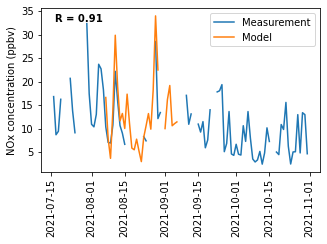

In [270]:
df_plot_measure = df_chamber_pasadena[(df_chamber_pasadena['UV_time']==0)&
                                      (df_chamber_pasadena['Bag']=='bag2')]
df_plot_model = df_NOx_model_pasadena[df_NOx_model_pasadena['Time']==0]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOx')

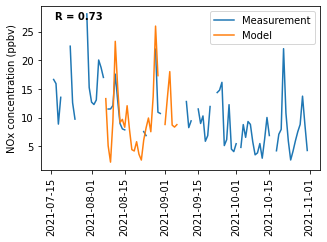

In [271]:
df_plot_measure = df_chamber_pasadena[(df_chamber_pasadena['UV_time']==170)&
                                      (df_chamber_pasadena['Bag']=='bag2')]
df_plot_model = df_NOx_model_pasadena[df_NOx_model_pasadena['Time']==170]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOx')

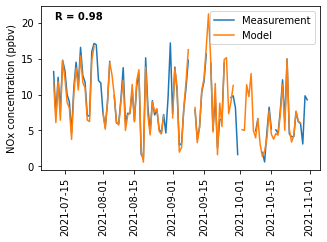

In [279]:
df_plot_measure = df_chamber_redlands[(df_chamber_redlands['UV_time']==0)&
                                      (df_chamber_redlands['Bag']=='bag2')]
df_plot_model = df_NOx_model_redlands[df_NOx_model_redlands['Time']==0]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOx')

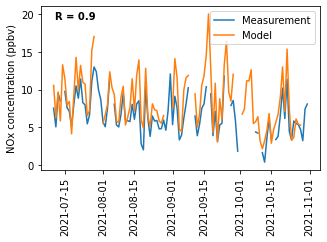

In [282]:
df_plot_measure = df_chamber_redlands[(df_chamber_redlands['UV_time']==170)&
                                      (df_chamber_redlands['Bag']=='bag2')]
df_plot_model = df_NOx_model_redlands[df_NOx_model_redlands['Time']==170]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOx')

## Compare NOy

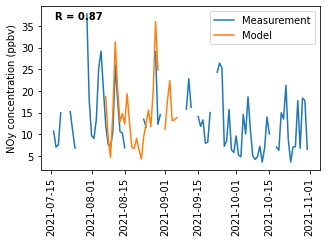

In [274]:
df_plot_measure = df_chamber_pasadena[(df_chamber_pasadena['UV_time']==0)&
                                      (df_chamber_pasadena['Bag']=='bag2')]
df_plot_model = df_NOy_model_pasadena[df_NOy_model_pasadena['Time']==0]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOy')

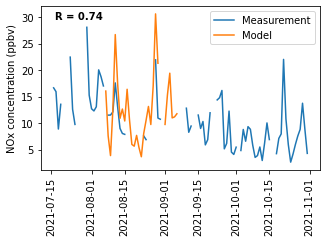

In [275]:
df_plot_measure = df_chamber_pasadena[(df_chamber_pasadena['UV_time']==170)&
                                      (df_chamber_pasadena['Bag']=='bag2')]
df_plot_model = df_NOy_model_pasadena[df_NOy_model_pasadena['Time']==170]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOx')

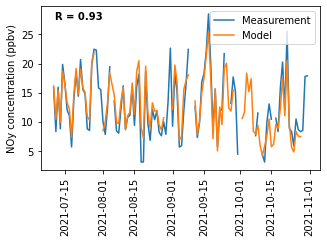

In [276]:
df_plot_measure = df_chamber_redlands[(df_chamber_redlands['UV_time']==0)&
                                      (df_chamber_redlands['Bag']=='bag2')]
df_plot_model = df_NOy_model_redlands[df_NOy_model_redlands['Time']==0]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOy')

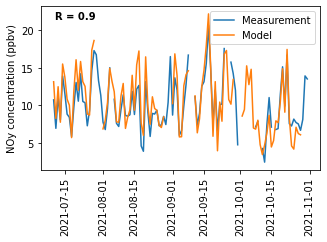

In [277]:
df_plot_measure = df_chamber_redlands[(df_chamber_redlands['UV_time']==170)&
                                      (df_chamber_redlands['Bag']=='bag2')]
df_plot_model = df_NOy_model_redlands[df_NOy_model_redlands['Time']==170]
fig = plot_scatter_measure_model_withR(df_plot_measure, df_plot_model, 'NOy')